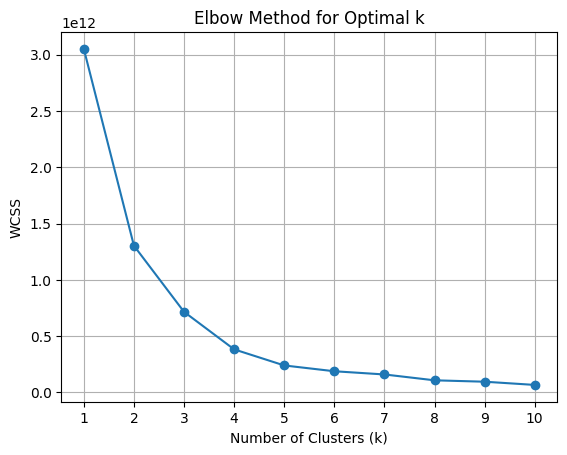

In [21]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("Salaries.csv")

# Select relevant features for clustering
features = ['experience_level', 'employment_type', 'salary_in_usd', 'remote_ratio', 'company_size']

# Perform one-hot encoding for categorical variables
X = pd.get_dummies(data[features])

# Initialize a list to store the within-cluster sum of squares (WCSS) values
wcss = []

# Define the range of k values to try
k_range = range(1, 11)

# Apply K-Means clustering for each value of k and calculate WCSS
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method curve
plt.plot(k_range, wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.xticks(k_range)
plt.grid(True)
plt.show()


In [22]:
# Fit KMeans with the optimal number of clusters
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(X)

# Get the cluster labels
cluster_labels = kmeans.labels_

# Add the cluster labels to the original dataframe
data['cluster'] = cluster_labels

# Print the counts of data points in each cluster
print(data['cluster'].value_counts())

# Optionally, you can also explore the centroids of the clusters
cluster_centers = kmeans.cluster_centers_
print("Cluster Centers:")
print(cluster_centers)


cluster
0    250
3    196
1    151
2     10
Name: count, dtype: int64
Cluster Centers:
[[ 1.08419852e+05  7.12000000e+01  1.08000000e-01  3.60000000e-02
   3.28000000e-01  5.28000000e-01  8.00000000e-03  4.00000000e-03
   9.84000000e-01  4.00000000e-03  2.68000000e-01  6.20000000e-01
   1.12000000e-01]
 [ 1.86370563e+05  7.98013245e+01  1.98675497e-02  7.94701987e-02
   1.52317881e-01  7.48344371e-01  6.62251656e-03  8.67361738e-19
   9.93377483e-01 -1.38777878e-17  3.50993377e-01  6.02649007e-01
   4.63576159e-02]
 [ 4.18500000e+05  8.50000000e+01 -2.77555756e-17  4.00000000e-01
   3.00000000e-01  3.00000000e-01  1.00000000e-01  0.00000000e+00
   9.00000000e-01  0.00000000e+00  7.00000000e-01  2.00000000e-01
   1.00000000e-01]
 [ 4.45555561e+04  6.30102041e+01  2.95918367e-01  5.10204082e-03
   5.35714286e-01  1.63265306e-01  5.10204082e-03  1.53061224e-02
   9.33673469e-01  4.59183673e-02  3.62244898e-01  3.97959184e-01
   2.39795918e-01]]


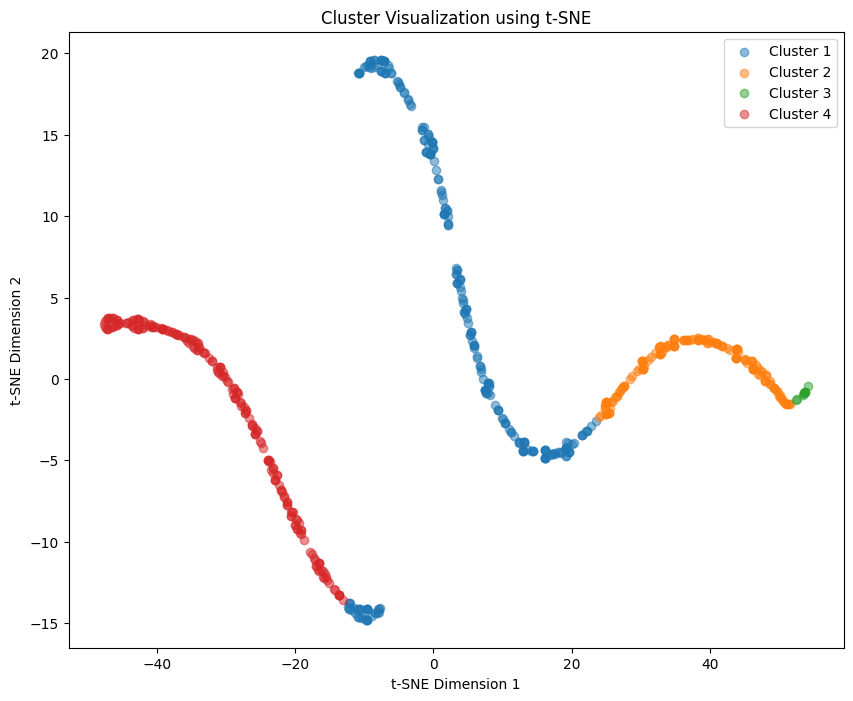

In [24]:
# Reduce dimensionality using t-SNE
tsne = TSNE(n_components=2, perplexity=30, random_state=42)  # Adjust perplexity as needed
X_tsne = tsne.fit_transform(X)

# Get cluster labels
labels = kmeans.labels_

# Plot clusters
plt.figure(figsize=(10, 8))
for cluster in range(4):  # Change the range to match the number of clusters
    plt.scatter(X_tsne[labels == cluster, 0], X_tsne[labels == cluster, 1], label=f'Cluster {cluster + 1}', alpha=0.5)

plt.title('Cluster Visualization using t-SNE')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.legend()
plt.show()
